In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("final_data_aqi.xlsx")

In [3]:
data.head()

,Unnamed: 0,Average_Temp,Max_Temp,Min_Temp,Atm_Pressure,Average_relative_humidity(%),Total_rainfall_snowmelt(mm),Average_visibility,Average_wind_speed,Maximum_sustained_wind_speed,PM2.5
0,0,7.4,9.8,4.8,1017.6,93,0.0,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87,0.0,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82,0.0,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72,0.0,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61,0.0,1.3,8.7,22.2,200.645833


In [4]:
data.columns

Index(['Unnamed: 0', 'Average_Temp', 'Max_Temp', 'Min_Temp', 'Atm_Pressure',
       'Average_relative_humidity(%)', 'Total_rainfall_snowmelt(mm)',
       'Average_visibility', 'Average_wind_speed',
       'Maximum_sustained_wind_speed', 'PM2.5'],
      dtype='object')

In [5]:
data.drop("Unnamed: 0", axis = 1, inplace= True)

In [6]:
data.head()

,Average_Temp,Max_Temp,Min_Temp,Atm_Pressure,Average_relative_humidity(%),Total_rainfall_snowmelt(mm),Average_visibility,Average_wind_speed,Maximum_sustained_wind_speed,PM2.5
0,7.4,9.8,4.8,1017.6,93,0.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,0.0,1.3,8.7,22.2,200.645833


In [7]:
#check for outliers:
Q1 = np.quantile(data, 0.25)
Q3 = np.quantile(data, 0.75)
IQR = Q3 - Q1


In [8]:
((data < (Q1- 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Average_Temp                       0
Max_Temp                           0
Min_Temp                           0
Atm_Pressure                    1028
Average_relative_humidity(%)       0
Total_rainfall_snowmelt(mm)        1
Average_visibility                 0
Average_wind_speed                 0
Maximum_sustained_wind_speed       0
PM2.5                            363
dtype: int64

In [9]:
#check for skewness
data.skew()

Average_Temp                   -0.400793
Max_Temp                       -0.482045
Min_Temp                       -0.312132
Atm_Pressure                   -0.084276
Average_relative_humidity(%)   -0.381071
Total_rainfall_snowmelt(mm)     9.193764
Average_visibility              0.044529
Average_wind_speed              0.763959
Maximum_sustained_wind_speed    1.413430
PM2.5                           0.997217
dtype: float64

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


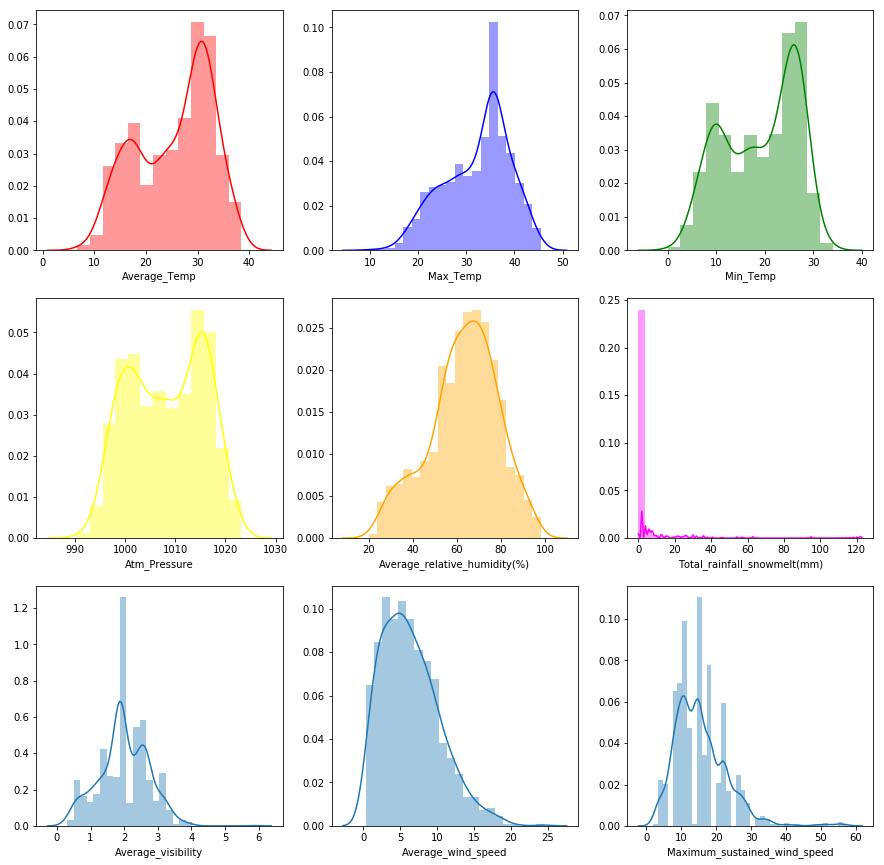

In [10]:
#visualization of skewness
fig, ax = plt.subplots(3,3, figsize = (15,15))
sns.distplot(data["Average_Temp"], kde =True, color= "red", ax = ax [0,0])
sns.distplot(data["Max_Temp"], kde =True, color= "blue", ax = ax [0,1])
sns.distplot(data["Min_Temp"], kde =True, color= "green", ax = ax [0,2])
sns.distplot(data["Atm_Pressure"], kde =True, color= "yellow", ax = ax [1,0])
sns.distplot(data["Average_relative_humidity(%)"], kde =True, color= "orange", ax = ax [1,1])
sns.distplot(data["Total_rainfall_snowmelt(mm)"], kde =True, color= "magenta", ax = ax [1,2])
sns.distplot(data["Average_visibility"], kde =True, ax = ax [2,0])
sns.distplot(data["Average_wind_speed"], kde =True, ax = ax [2,1])
sns.distplot(data["Maximum_sustained_wind_speed"], kde =True, ax = ax [2,2])

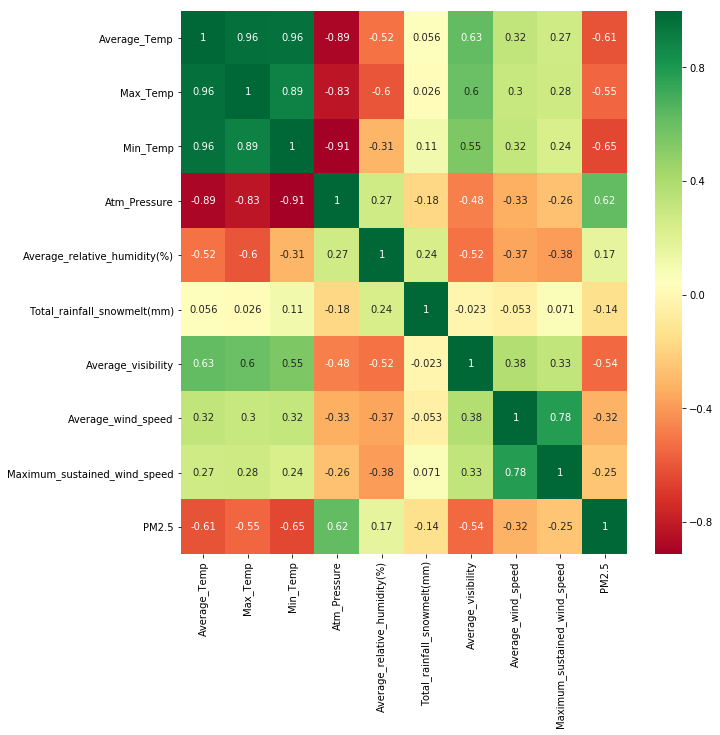

In [11]:
#correlation
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot= True, cmap = "RdYlGn")

In [12]:
data.drop(["Average_relative_humidity(%)", "Total_rainfall_snowmelt(mm)", "Average_wind_speed", "Maximum_sustained_wind_speed"], axis = 1, inplace = True)

In [13]:
# Independent Variable
x= data.iloc[:, :-1]
# Dependent Variale
y = data.iloc[:, -1]

In [14]:
# Train, Test and Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
rfr.score(x_train, y_train)

0.9070786549008729

In [17]:
rfr.score(x_test, y_test)

0.495583359403455

### HYPERMETER TUNING

In [18]:
paramters = dict(max_depth=[int(x) for x in np.linspace(5, 30, num = 6)],max_features=['auto', "log2", "sqrt", None],min_samples_leaf=[1,2,5,10,15],min_samples_split=[2, 5, 10,15,100],min_weight_fraction_leaf=[0.0,0.05,0.5],n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)])

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
random_forest_regressor = RandomizedSearchCV(rfr, paramters, scoring = "neg_mean_squared_error", cv = 5, verbose = 3, n_iter= 100)
random_forest_regressor.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20, score=-3014.623831430715, total=   0.3s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20, score=-3035.1873833701657, total=   0.3s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20, score=-3136.9517944317145, total=   0.3s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20, score=-3789.8829392306357, total=   0.3s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=15, max_features=None, max_depth=20, score=-3452.3698946066647, total=   0.3s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=2, max_features

[CV]  n_estimators=700, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, score=-3134.8308282137236, total=   1.2s
[CV] n_estimators=700, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, score=-3063.189260118959, total=   1.1s
[CV] n_estimators=700, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, score=-3087.2552689277786, total=   1.2s
[CV] n_estimators=700, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=auto,

[CV]  n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=15, max_features=None, max_depth=30, score=-4831.75348629907, total=   0.7s
[CV] n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=15, max_features=None, max_depth=30 
[CV]  n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=15, max_features=None, max_depth=30, score=-4445.565783642781, total=   0.7s
[CV] n_estimators=700, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, score=-2972.8062467495593, total=   0.7s
[CV] n_estimators=700, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, ma

[CV]  n_estimators=100, min_weight_fraction_leaf=0.05, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30, score=-2997.579691764969, total=   0.0s
[CV] n_estimators=100, min_weight_fraction_leaf=0.05, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_weight_fraction_leaf=0.05, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30, score=-3115.8924012636944, total=   0.0s
[CV] n_estimators=100, min_weight_fraction_leaf=0.05, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_weight_fraction_leaf=0.05, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30, score=-3732.58999390033, total=   0.0s
[CV] n_estimators=100, min_weight_fraction_leaf=0.05, min_samples_split=5, min_samples_leaf=15, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_weight_fraction_leaf=0.05, min_samples_split=5, min_samples_leaf=15, max_fe

[CV]  n_estimators=600, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, score=-3347.436022715833, total=   0.6s
[CV] n_estimators=1100, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=1100, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10, score=-2992.41699451136, total=   1.3s
[CV] n_estimators=1100, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=1100, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10, score=-3072.018340542273, total=   1.2s
[CV] n_estimators=1100, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=1100, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=1, max_features=l

[CV]  n_estimators=400, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=15, max_features=log2, max_depth=10, score=-5132.164329831076, total=   0.2s
[CV] n_estimators=400, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=15, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=15, max_features=log2, max_depth=10, score=-5674.465042474665, total=   0.2s
[CV] n_estimators=400, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=15, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=15, max_features=log2, max_depth=10, score=-4993.398887850333, total=   0.2s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.0, min_samples_split=5, min_samples_leaf=2, max_features=s

[CV]  n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=5, score=-7071.009698864905, total=   0.6s
[CV] n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=5 
[CV]  n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=5, score=-6313.232076425217, total=   0.7s
[CV] n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=5 
[CV]  n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=5, score=-4997.295916864659, total=   0.7s
[CV] n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=5 
[CV]  n_estimators=900, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=1, max_features=log2, 

[CV]  n_estimators=800, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, score=-5676.892422173203, total=   0.5s
[CV] n_estimators=800, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, score=-5049.948515304657, total=   0.5s
[CV] n_estimators=200, min_weight_fraction_leaf=0.05, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_weight_fraction_leaf=0.05, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-2946.2943806962962, total=   0.1s
[CV] n_estimators=200, min_weight_fraction_leaf=0.05, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_weight_fraction_leaf=0.05, min_samples_split=2, min_samples_leaf=10, max_f

[CV]  n_estimators=800, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=None, max_depth=20, score=-2997.2256012761823, total=   0.8s
[CV] n_estimators=800, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=None, max_depth=20 
[CV]  n_estimators=800, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=None, max_depth=20, score=-3122.6002357245407, total=   0.8s
[CV] n_estimators=800, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=None, max_depth=20 
[CV]  n_estimators=800, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=None, max_depth=20, score=-3713.6427255944895, total=   0.8s
[CV] n_estimators=800, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=None, max_depth=20 
[CV]  n_estimators=800, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=

[CV]  n_estimators=400, min_weight_fraction_leaf=0.0, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=20, score=-3224.0209898669364, total=   0.5s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, score=-7070.440670274505, total=   0.8s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, score=-6312.196174673623, total=   0.8s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=1, max_features

[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, score=-3122.5620411420496, total=   0.2s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, score=-3717.937638812586, total=   0.2s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, score=-3645.3597146928246, total=   0.2s
[CV] n_estimators=1100, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=10, max_features=None, max_depth=5 
[CV]  n_estimators=1100, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=10, max_f

[CV]  n_estimators=300, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=20, score=-7070.411023401435, total=   0.1s
[CV] n_estimators=300, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=20 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=20, score=-6314.928970876315, total=   0.1s
[CV] n_estimators=300, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=20 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=20, score=-5109.582523574858, total=   0.1s
[CV] n_estimators=300, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=20 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.5, min_samples_split=2, min_samples_leaf=5, max_features=log2, m

[CV]  n_estimators=900, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=20, score=-3626.3042567495722, total=   0.7s
[CV] n_estimators=900, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=20 
[CV]  n_estimators=900, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=20, score=-3473.3149164926704, total=   0.7s
[CV] n_estimators=900, min_weight_fraction_leaf=0.0, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15 
[CV]  n_estimators=900, min_weight_fraction_leaf=0.0, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, score=-3080.442087231272, total=   1.3s
[CV] n_estimators=900, min_weight_fraction_leaf=0.0, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15 
[CV]  n_estimators=900, min_weight_fraction_leaf=0.0, min_samples_split=10, min_samples_leaf=1, max_f

[CV]  n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-5036.893808824424, total=   0.0s
[CV] n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-5857.6907713862065, total=   0.0s
[CV] n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-4928.292575617697, total=   0.0s
[CV] n_estimators=600, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=10, max_features=sqrt,

[CV]  n_estimators=400, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, score=-2997.432445272629, total=   0.4s
[CV] n_estimators=400, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, score=-2982.6393599373505, total=   0.4s
[CV] n_estimators=400, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, score=-3117.8508708130166, total=   0.4s
[CV] n_estimators=400, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_weight_fraction_leaf=0.05, min_samples_split=10, min_samples_leaf=1

[CV]  n_estimators=1000, min_weight_fraction_leaf=0.05, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20, score=-3638.02777961501, total=   0.9s
[CV] n_estimators=1000, min_weight_fraction_leaf=0.05, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20 
[CV]  n_estimators=1000, min_weight_fraction_leaf=0.05, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20, score=-3476.06113439389, total=   0.8s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=5, max_features=None, max_depth=15 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=5, max_features=None, max_depth=15, score=-7070.6488663749, total=   0.9s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=5, max_features=None, max_depth=15 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=15, min_samples_leaf=5, max_

[CV]  n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=100, min_samples_leaf=15, max_features=None, max_depth=25, score=-4480.391289873806, total=   0.0s
[CV] n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=100, min_samples_leaf=15, max_features=None, max_depth=25 
[CV]  n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=100, min_samples_leaf=15, max_features=None, max_depth=25, score=-4808.897251552008, total=   0.0s
[CV] n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=100, min_samples_leaf=15, max_features=None, max_depth=25 
[CV]  n_estimators=100, min_weight_fraction_leaf=0.5, min_samples_split=100, min_samples_leaf=15, max_features=None, max_depth=25, score=-4435.714896699079, total=   0.0s
[CV] n_estimators=500, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=20 
[CV]  n_estimators=500, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=1, max_f

[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=15, max_features=None, max_depth=25, score=-7070.882824555261, total=   0.9s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=15, max_features=None, max_depth=25 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=15, max_features=None, max_depth=25, score=-6312.64236143125, total=   0.9s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=15, max_features=None, max_depth=25 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=15, max_features=None, max_depth=25, score=-4471.5418403869635, total=   0.9s
[CV] n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=15, max_features=None, max_depth=25 
[CV]  n_estimators=1200, min_weight_fraction_leaf=0.5, min_samples_split=10, min_samples_leaf=15,

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.8min finished
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'log2', 'sqrt', None], 'min_samples_leaf': [1, 2, 5, 10, 15], 'min_samples_split': [2, 5, 10, 15, 100], 'min_weight_fraction_leaf': [0.0, 0.05, 0.5], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
        

In [20]:
random_forest_regressor_predict = random_forest_regressor.predict(x_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error
print("ACCURACY:", r2_score(y_test, random_forest_regressor_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, random_forest_regressor_predict)))
print("MSE:", mean_squared_error(y_test, random_forest_regressor_predict))

ACCURACY: 0.5222798081487698
RMSE: 59.65332314970062
MSE: 3558.5189628026073


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


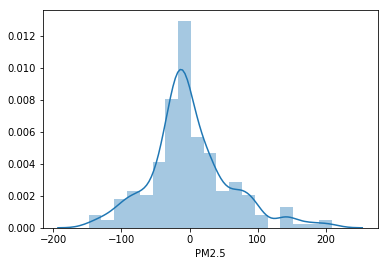

In [23]:
residual_random_forest = y_test - random_forest_regressor_predict
sns.distplot(residual_random_forest)

In [24]:
import pickle
random_forest_file = open("random_forest.pkl", "wb")
pickle.dump(random_forest_regressor, random_forest_file)